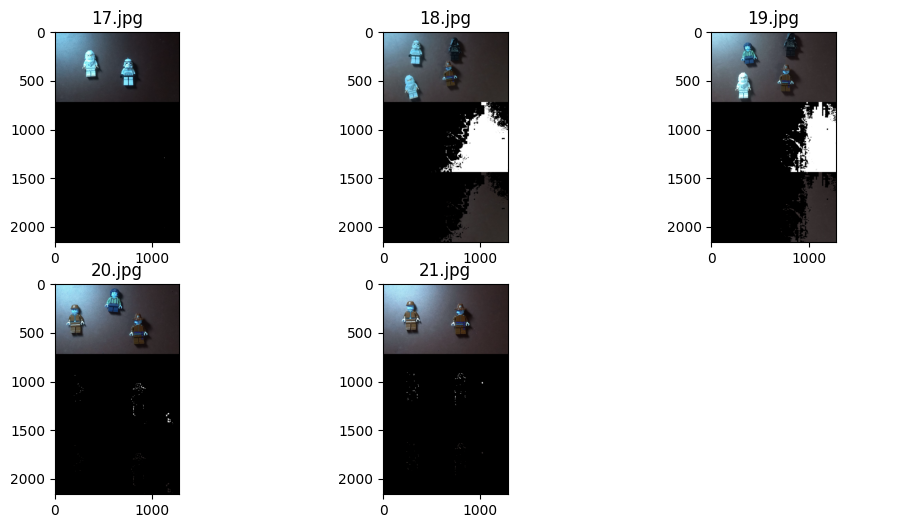

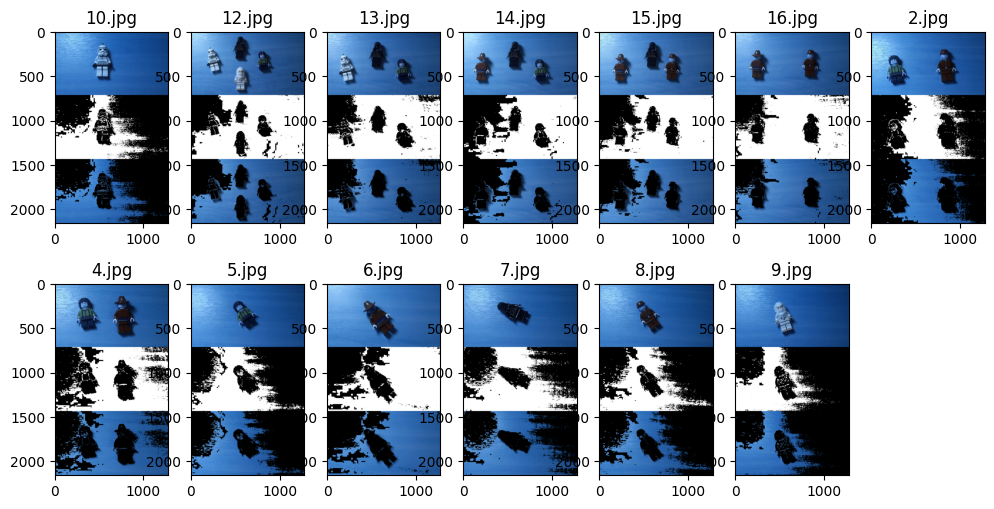

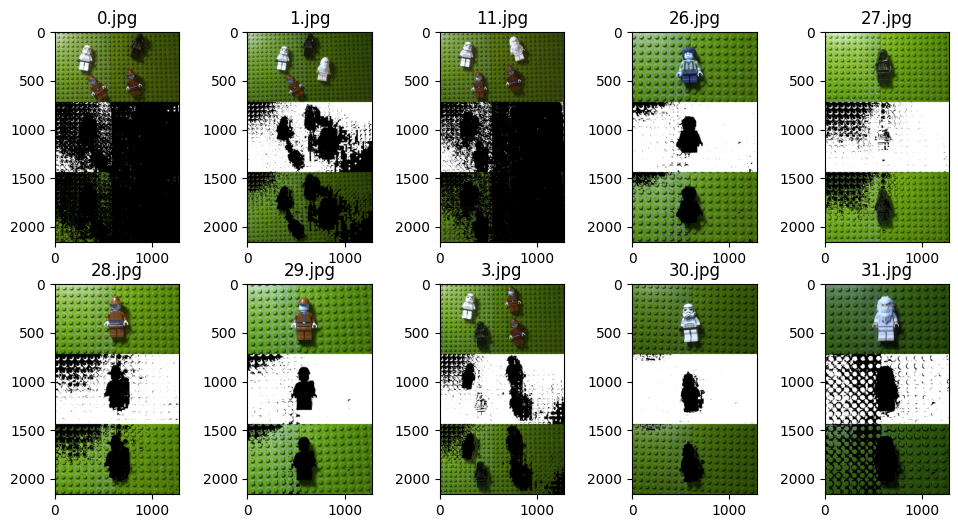

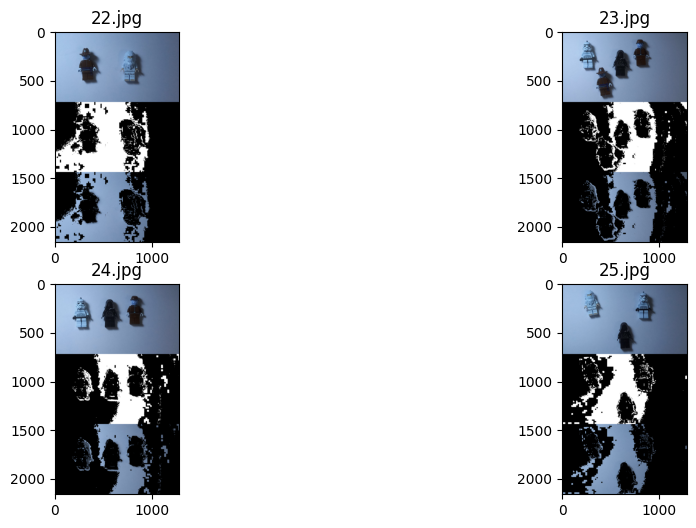

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

scenes = os.listdir('./img/scenes')
src_path = './img/'

for scene in scenes:
    files_path = os.path.join(src_path, 'scenes', scene)

    images = []

    files = os.listdir(files_path)
    for file in files:

        roi = cv.imread(src_path + 'rois/' + scene + '.jpg')

        hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
        target = cv.imread(os.path.join(files_path, file))

        hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
        # calculating object histogram
        roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
        # normalize histogram and apply backprojection
        cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
        dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
        # Now convolute with circular disc
        disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

        cv.filter2D(dst,-1,disc,dst)
        # threshold and binary AND
        ret,thresh = cv.threshold(dst,50,255,0)
        thresh = cv.merge((thresh,thresh,thresh))
        res = cv.bitwise_and(target,thresh)
        res = np.vstack((target,thresh,res))

        images.append((file, res))

    nrows = 2
    ncols = (len(images) + 1) // 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, (filename, image) in enumerate(images):
        ax = axes[i // ncols, i % ncols]
        ax.imshow(image)
        ax.set_title(filename)

    for i in range(len(images), nrows * ncols):
        ax = axes[i // ncols, i % ncols]
        ax.axis('off')

    plt.show()